In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.animation as animation
from sympy import symbols, hermite, expand
from itertools import product
from scipy import special

G: [[0.58       0.509      0.4342     0.36356    0.300568   0.2462864
  0.20052832 0.16252218 0.13127745 0.10577779]
 [0.509      0.4657     0.40766    0.347188   0.2903864  0.23989072
  0.19646154 0.1598986  0.12955651 0.10462778]
 [0.4342     0.40766    0.362308   0.3115544  0.26226832 0.21762954
  0.17879256 0.1458474  0.11836594 0.09570556]
 [0.36356    0.347188   0.3115544  0.26952592 0.22779018 0.1895338
  0.15600804 0.12743503 0.10352519 0.08376644]
 [0.300568   0.2903864  0.26226832 0.22779018 0.19301745 0.16088515
  0.13259083 0.10840229 0.08811961 0.07133435]
 [0.2462864  0.23989072 0.21762954 0.1895338  0.16088515 0.13426298
  0.1107433  0.09059439 0.07367537 0.0596602 ]
 [0.20052832 0.19646154 0.17879256 0.15600804 0.13259083 0.1107433
  0.09139703 0.07479905 0.0608481  0.04928379]
 [0.16252218 0.1598986  0.1458474  0.12743503 0.10840229 0.09059439
  0.07479905 0.06123336 0.04982316 0.04036041]
 [0.13127745 0.12955651 0.11836594 0.10352519 0.08811961 0.07367537
  0.0608481 

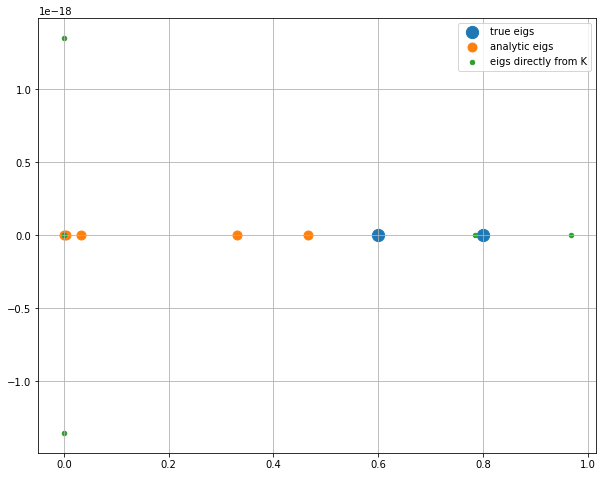

In [36]:
%run DMD_functions.ipynb 
%run Hemati_DMD_functions.ipynb
%run analytic_edmd.ipynb

## One-dimensional cubic dynamics

0.5


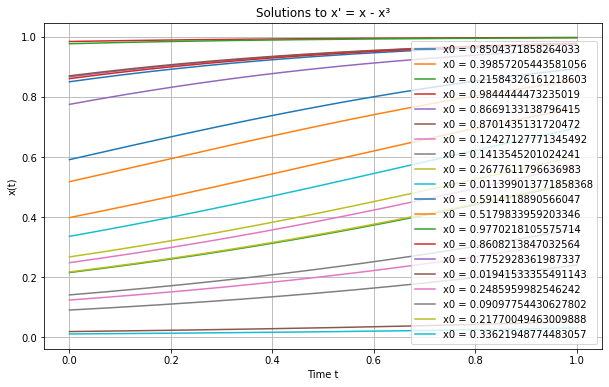

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the differential equation
def dxdt(x, t):
    return x - x**3

# Time points
t = np.linspace(0, 1, 1001)
print(t[500])

# Initial conditions to explore different behaviors
initial_conditions = np.random.uniform(0,1,20)

# Solve for each initial condition
solutions = []
y=[]
x_dugacki=[]
y_dugacki=[]
for x0 in initial_conditions:
    sol = odeint(dxdt, x0, t)
    solutions.append(sol)
    y.append(sol[500])
    y_dugacki.append(sol[[100,200, 300,400, 500]].reshape(-1))
    x_dugacki.append(sol[[0,100,200, 300,400]].reshape(-1))
     #delta t = 0.1 sada

# Plot the results
plt.figure(figsize=(10, 6))
for i, sol in enumerate(solutions):
    plt.plot(t, sol, label=f'x0 = {initial_conditions[i]}')
    
plt.title("Solutions to x' = x - x³")
plt.xlabel('Time t')
plt.ylabel('x(t)')
plt.legend()
plt.grid(True)
plt.show()

"""# Generate data for analysis (time, x, x')
data = []
for i, sol in enumerate(solutions):
    for j in range(len(t)):
        x = sol[j][0]
        x_prime = dxdt(x, t[j])
        data.append([t[j], initial_conditions[i], x, x_prime])

# Convert to numpy array for easier handling
data_array = np.array(data)"""
y_dugacki=np.array(y_dugacki).reshape(1,-1)
x_dugacki=np.array(x_dugacki).reshape(1,-1)

In [38]:
x=np.array(initial_conditions)
x=x.reshape(-1,1)
y=np.array(y)
x=x.T
y=y.T

In [39]:
Z, L = DMD(x, y)
print(Z)
print(L)

[[-1.]]
[1.13286882]


Hankel DMD

In [40]:
n,m = x.shape
num_stack = 10

x_stacked = x[:,:(m-num_stack+1)]
y_stacked = y[:,:(m-num_stack+1)]

for i in range(1,num_stack):
    x_stacked=np.vstack((x_stacked,x[:,i:(m-num_stack+1+i)]))
    y_stacked=np.vstack((y_stacked,y[:,i:(m-num_stack+1+i)]))

(n_s,m_s)=x_stacked.shape

x_stacked, y_stacked, n_s, m_s

(array([[0.85043719, 0.39857205, 0.21584326, 0.98444445, 0.86691331,
         0.87014351, 0.12427128, 0.14135452, 0.26776118, 0.01139901,
         0.59141189],
        [0.39857205, 0.21584326, 0.98444445, 0.86691331, 0.87014351,
         0.12427128, 0.14135452, 0.26776118, 0.01139901, 0.59141189,
         0.5179834 ],
        [0.21584326, 0.98444445, 0.86691331, 0.87014351, 0.12427128,
         0.14135452, 0.26776118, 0.01139901, 0.59141189, 0.5179834 ,
         0.97702181],
        [0.98444445, 0.86691331, 0.87014351, 0.12427128, 0.14135452,
         0.26776118, 0.01139901, 0.59141189, 0.5179834 , 0.97702181,
         0.86082138],
        [0.86691331, 0.87014351, 0.12427128, 0.14135452, 0.26776118,
         0.01139901, 0.59141189, 0.5179834 , 0.97702181, 0.86082138,
         0.77529284],
        [0.87014351, 0.12427128, 0.14135452, 0.26776118, 0.01139901,
         0.59141189, 0.5179834 , 0.97702181, 0.86082138, 0.77529284,
         0.01941533],
        [0.12427128, 0.14135452, 0.26776

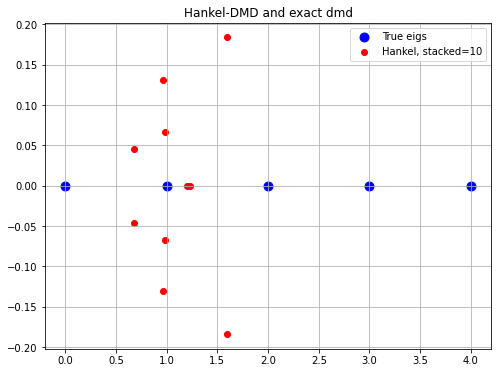

In [41]:
Z_h, L_h = DMD(x_stacked, y_stacked)

fig=plt.figure(figsize=(8,6))
plt.scatter([0,1,2,3,4], [0,0,0,0,0], label="True eigs", s=80, c="blue")
plt.scatter(np.real(L_h), np.imag(L_h), label="Hankel, stacked={}".format(num_stack), c="r")
plt.title("Hankel-DMD and exact dmd")
plt.legend()
plt.grid()
fig.savefig("Hankel-num_stack={}-and-exact-eigs-comparison.png".format(num_stack),dpi=fig.dpi, bbox_inches='tight')

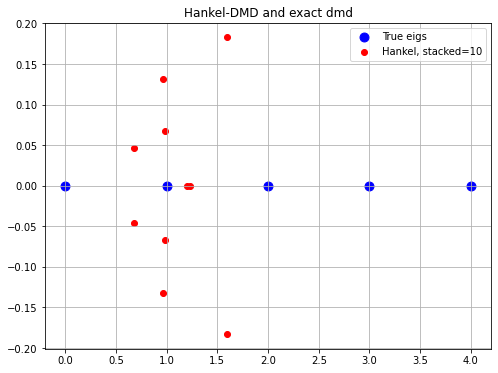

In [42]:
Z_h, L_h, _ = GEDMDQ_multiple_trajectories(x_stacked, y_stacked)

fig=plt.figure(figsize=(8,6))
plt.scatter([0,1,2,3,4], [0,0,0,0,0], label="True eigs", s=80, c="blue")
plt.scatter(np.real(L_h), np.imag(L_h), label="Hankel, stacked={}".format(num_stack), c="r")
plt.title("Hankel-DMD and exact dmd")
plt.legend()
plt.grid()
fig.savefig("Hankel-num_stack={}-and-exact-eigs-comparison-QRDMD.png".format(num_stack),dpi=fig.dpi, bbox_inches='tight')

Monomi

In [43]:
def multivariate_monomials_sympy(x_vars, max_degree):
    """
    Construct symbolic multivariate monomials up to a given degree.
    
    Parameters:
        x_vars (list of symbols): Variables (x1, x2, ..., xn).
        max_degree (int): Maximum total degree.

    Returns:
        dict: A dictionary mapping multi-degree tuples to polynomial expressions.
    """
    n = len(x_vars)
    polynomials = {}
    
    for degrees in product(range(max_degree + 1), repeat=n):
        if sum(degrees) > max_degree:
            continue
        
        poly = 1
        for i in range(n):
            poly *= x_vars[i]**(degrees[i])
        polynomials[degrees] = poly
    
    return polynomials

# Example usage:
x1, x2 = symbols('x1 x2')
x_vars = [x1, x2]
max_degree = 2

polys = multivariate_monomials_sympy(x_vars, max_degree)

# Print all polynomials up to degree 2
for degrees, poly in polys.items():
    print(f"M{degrees}(x1,x2) = {poly}")

# Evaluate at a specific point (x1=1.0, x2=2.0)
x_eval = {x1: 1.0, x2: 2.0}
H_val = polys[(1, 1)].subs(x_eval)  # Evaluates H_1(x1) * H_1(x2) at (1.0, 2.0)
print(H_val)


##DRUGI PRIMJER
x1, x2, x3 = symbols('x1 x2 x3')
x_vars = [x1, x2, x3]
max_degree = 4

polys = multivariate_monomials_sympy(x_vars, max_degree)

for degrees, poly in polys.items():
    print(f"M{degrees}(x1,x2,x3) = {poly}")

x_eval = {x1: 1.0, x2: 2.0, x3: 3.0}
H_val = polys[(1, 1, 0)].subs(x_eval)
print(H_val)

M(0, 0)(x1,x2) = 1
M(0, 1)(x1,x2) = x2
M(0, 2)(x1,x2) = x2**2
M(1, 0)(x1,x2) = x1
M(1, 1)(x1,x2) = x1*x2
M(2, 0)(x1,x2) = x1**2
2.00000000000000
M(0, 0, 0)(x1,x2,x3) = 1
M(0, 0, 1)(x1,x2,x3) = x3
M(0, 0, 2)(x1,x2,x3) = x3**2
M(0, 0, 3)(x1,x2,x3) = x3**3
M(0, 0, 4)(x1,x2,x3) = x3**4
M(0, 1, 0)(x1,x2,x3) = x2
M(0, 1, 1)(x1,x2,x3) = x2*x3
M(0, 1, 2)(x1,x2,x3) = x2*x3**2
M(0, 1, 3)(x1,x2,x3) = x2*x3**3
M(0, 2, 0)(x1,x2,x3) = x2**2
M(0, 2, 1)(x1,x2,x3) = x2**2*x3
M(0, 2, 2)(x1,x2,x3) = x2**2*x3**2
M(0, 3, 0)(x1,x2,x3) = x2**3
M(0, 3, 1)(x1,x2,x3) = x2**3*x3
M(0, 4, 0)(x1,x2,x3) = x2**4
M(1, 0, 0)(x1,x2,x3) = x1
M(1, 0, 1)(x1,x2,x3) = x1*x3
M(1, 0, 2)(x1,x2,x3) = x1*x3**2
M(1, 0, 3)(x1,x2,x3) = x1*x3**3
M(1, 1, 0)(x1,x2,x3) = x1*x2
M(1, 1, 1)(x1,x2,x3) = x1*x2*x3
M(1, 1, 2)(x1,x2,x3) = x1*x2*x3**2
M(1, 2, 0)(x1,x2,x3) = x1*x2**2
M(1, 2, 1)(x1,x2,x3) = x1*x2**2*x3
M(1, 3, 0)(x1,x2,x3) = x1*x2**3
M(2, 0, 0)(x1,x2,x3) = x1**2
M(2, 0, 1)(x1,x2,x3) = x1**2*x3
M(2, 0, 2)(x1,x2,x3) = x1**2*x3**2
M(

In [44]:
N = 10 #max stupanj
B_X=multivariate_monomials_sympy(x[:,0], N)
B_X = np.fromiter(B_X.values(), dtype=complex).reshape(-1,1)
B_Y = multivariate_monomials_sympy(y[:,0], N)
B_Y = np.fromiter(B_Y.values(), dtype=complex).reshape(-1,1)

for i in range(1, x.shape[1]):
    novi_x = multivariate_monomials_sympy(x[:,i], N)
    novi_x = np.fromiter(novi_x.values(), dtype=complex).reshape(-1,1)
    novi_y = multivariate_monomials_sympy(y[:,i], N)
    novi_y = np.fromiter(novi_y.values(), dtype=complex).reshape(-1,1)
    B_X=np.hstack((B_X, novi_x))
    B_Y = np.hstack((B_Y, novi_y))
B_X = np.array(B_X)
B_Y = np.array(B_Y)

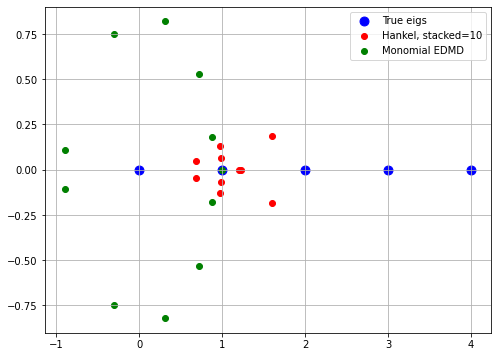

In [45]:
Z_h, L_h = DMD(x_stacked, y_stacked)
Z_m, L_m = DMD(B_X, B_Y)

fig=plt.figure(figsize=(8,6))
plt.scatter([0,1,2,3,4], [0,0,0,0,0], label="True eigs", s=80, c="blue")
plt.scatter(np.real(L_h), np.imag(L_h), label="Hankel, stacked={}".format(num_stack), c="r")
plt.scatter(np.real(L_m), np.imag(L_m), label="Monomial EDMD", c="g")
#plt.title("")
plt.legend()
plt.grid()
fig.savefig("Hankel-num_stack={}-monomials_up_to_deg_{}-and-exact-eigs-comparison.png".format(num_stack, N),dpi=fig.dpi, bbox_inches='tight')

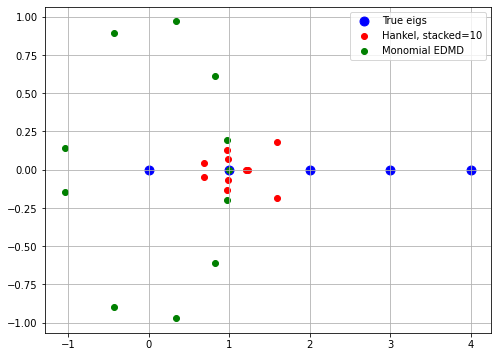

In [46]:
Z_h, L_h,_ = GEDMDQ_multiple_trajectories(x_stacked, y_stacked) #drugi rez za tol =1e-6...
Z_m, L_m,_ = GEDMDQ_multiple_trajectories(B_X, B_Y)

fig=plt.figure(figsize=(8,6))
plt.scatter([0,1,2,3,4], [0,0,0,0,0], label="True eigs", s=80, c="blue")
plt.scatter(np.real(L_h), np.imag(L_h), label="Hankel, stacked={}".format(num_stack), c="r")
plt.scatter(np.real(L_m), np.imag(L_m), label="Monomial EDMD", c="g")
#plt.title("")
plt.legend()
plt.grid()
fig.savefig("Hankel-num_stack={}-monomials_up_to_deg_{}-and-exact-eigs-comparison-QRDMD.png".format(num_stack, N),dpi=fig.dpi, bbox_inches='tight')

Hermiteovi polinomi

In [47]:
hm = special.hermite(3,True)
hm(x[:,:])
print(hm, x[:,0], hm(x[:,:]).shape)

   3
1 x - 1.5 x [0.85043719] (1, 20)


In [48]:
B_X_h = np.empty((N, m))
B_Y_h = np.empty((N,m))
for i in range (N):
    hm = special.hermite(i, True)
    B_X_h[i,:] = hm(x[:,:]).reshape(1,-1)
    B_Y_h[i,:] = hm(y[:,:]).reshape(1,-1)


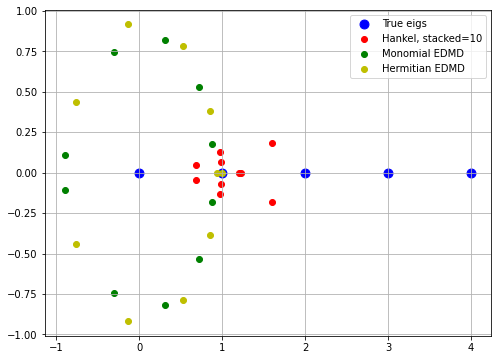

In [49]:
Z_h, L_h = DMD(x_stacked, y_stacked)
Z_m, L_m = DMD(B_X, B_Y)
Z_herm, L_herm = DMD(B_X_h, B_Y_h)

fig=plt.figure(figsize=(8,6))
plt.scatter([0,1,2,3,4], [0,0,0,0,0], label="True eigs", s=80, c="blue")
plt.scatter(np.real(L_h), np.imag(L_h), label="Hankel, stacked={}".format(num_stack), c="r")
plt.scatter(np.real(L_m), np.imag(L_m), label="Monomial EDMD", c="g")
plt.scatter(np.real(L_herm), np.imag(L_herm), label="Hermitian EDMD", c="y")
#plt.title("")
plt.legend()
plt.grid()
fig.savefig("Hankel-num_stack={}-monomials_up_to_deg_{}-hermitian_polynomials_up_to_deg_{}-and-exact-eigs-comparison.png".format(num_stack, N,N),dpi=fig.dpi, bbox_inches='tight')

c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


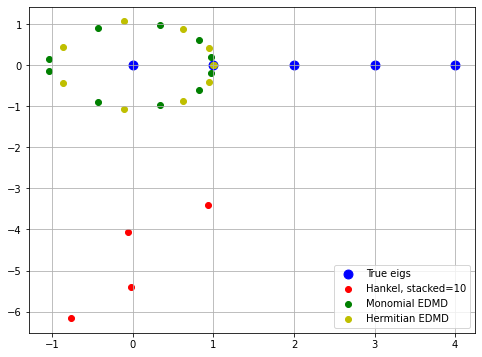

In [50]:
Z_h, L_h,_ = GEDMDQ_multiple_trajectories(x_stacked, y_stacked)
Z_m, L_m,_ = GEDMDQ_multiple_trajectories(B_X, B_Y)
Z_herm, L_herm,_ = GEDMDQ_multiple_trajectories(B_X_h, B_Y_h)

fig=plt.figure(figsize=(8,6))
plt.scatter([0,1,2,3,4], [0,0,0,0,0], label="True eigs", s=80, c="blue")
#logaritmirati pa podijeliti sa delta t..
plt.scatter(np.log(np.real(L_h))/0.5, np.log(np.imag(L_h))/0.5, label="Hankel, stacked={}".format(num_stack), c="r")
plt.scatter(np.real(L_m), np.imag(L_m), label="Monomial EDMD", c="g")
plt.scatter(np.real(L_herm), np.imag(L_herm), label="Hermitian EDMD", c="y")
#plt.title("")
plt.legend()
plt.grid()
#fig.savefig("Hankel-num_stack={}-monomials_up_to_deg_{}-hermitian_polynomials_up_to_deg_{}-and-exact-eigs-comparison-QRDMD.png".format(num_stack, N,N),dpi=fig.dpi, bbox_inches='tight')

In [51]:
def szabo_kernel(x,y):
    rez = 1
    for j in range(x.shape[0]):
        rez = rez*(1/(1-x[j]*y[j]))
    return rez

def e0(x): return 1.0
def e1(x): return x[0]
def e2(x): return x[0]**2
def e3(x): return x[0]**3
def e4(x): return x[0]**4
def e5(x): return x[0]**5
def e6(x): return x[0]**6


basis = [e0, e1, e2, e3, e4, e5, e6]

In [52]:
K, eigenvalues, eigenfunction_coeffs = analytic_edmd(
    x.T, y.T,
    equilibrium_point=np.array([0.0]),
    kernel_func=szabo_kernel,
    basis_funcs=basis,
    degrees=np.array([0,1,2,3,4,5,6]),
    delta_t=0.5,
    continuous_time=True,
    on=False
)

print("Koopman matrix approximation:")
print(K)
print("\nKoopman eigenvalues:")
print(eigenvalues)
print("\nEigenfunction coefficients:")
print(eigenfunction_coeffs)

G: [[ 3.61328339  1.5127689   1.22483145  6.14281424  3.80597619  3.84618936
   1.11817414  1.13663894  1.29485719  1.00978904  2.0119051   1.78734952
   5.91350945  3.73238105  2.93545973  1.01678873  1.26809457  1.08385891
   1.22720557  1.4004299 ]
 [ 1.5127689   1.18886229  1.09412673  1.6457439   1.52794789  1.53095957
   1.05211223  1.05970366  1.11947248  1.00456406  1.30842143  1.26016593
   1.63776983  1.52230021  1.44719907  1.00779876  1.10998068  1.03762545
   1.0950136   1.15474467]
 [ 1.22483145  1.09412673  1.04886484  1.26981821  1.23018994  1.23124599
   1.02756243  1.0314706   1.06133953  1.00246647  1.14633187  1.12587664
   1.26724013  1.22820322  1.20097289  1.0042083   1.05670018  1.02003022
   1.04930604  1.07824932]
 [ 6.14281424  1.6457439   1.26981821 32.39482278  6.8225854   6.97388732
   1.13939101  1.16165022  1.35795027  1.01134905  2.39355932  2.04050766
  26.19425936  6.55440424  4.2235567   1.01948575  1.32402798  1.09837284
   1.27277316  1.49474464]
 

c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:90: RuntimeWarning: invalid value encountered in log


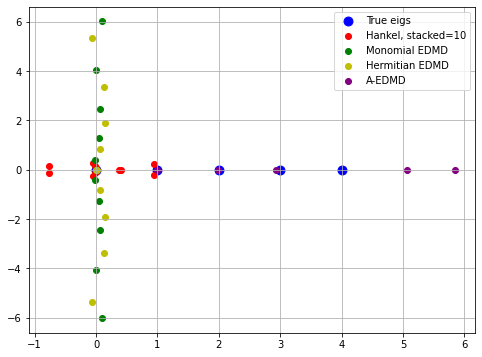

In [53]:
Z_h, L_h,_ = GEDMDQ_multiple_trajectories(x_stacked, y_stacked)
Z_m, L_m,_ = GEDMDQ_multiple_trajectories(B_X, B_Y)
Z_herm, L_herm,_ = GEDMDQ_multiple_trajectories(B_X_h, B_Y_h)

fig=plt.figure(figsize=(8,6))
plt.scatter([0,1,2,3,4], [0,0,0,0,0], label="True eigs", s=80, c="blue")
#logaritmirati pa podijeliti sa delta t..
plt.scatter(np.real(np.log(L_h)/0.5), (np.imag(np.log(L_h)/0.5)), label="Hankel, stacked={}".format(num_stack), c="r")
plt.scatter(np.real(np.log(L_m)/0.5), np.imag(np.log(L_m)/0.5), label="Monomial EDMD", c="g")
plt.scatter(np.real(np.log(L_herm)/0.5), np.imag(np.log(L_herm)/0.5), label="Hermitian EDMD", c="y")
plt.scatter(np.real(eigenvalues), np.imag(eigenvalues), label="A-EDMD", c="purple")
#plt.title("")
plt.legend()
plt.grid()
fig.savefig("Hankel-num_stack={}-monomials_up_to_deg_{}-hermitian_polynomials_up_to_deg_{}-AEDMD-szago_kernel-and-exact-eigs-comparison-QRDMD.png".format(num_stack, N,N),dpi=fig.dpi, bbox_inches='tight')

In [54]:
K, eigenvalues, eigenfunction_coeffs = analytic_edmd(
    x.T, y.T,
    equilibrium_point=np.array([1.0]),
    kernel_func=szabo_kernel,
    basis_funcs=basis,
    degrees=np.array([0,1,2,3,4,5,6]),
    delta_t=0.5,
    continuous_time=True,
    on=False
)

print("Koopman matrix approximation:")
print(K)
print("\nKoopman eigenvalues:")
print(eigenvalues)
print("\nEigenfunction coefficients:")
print(eigenfunction_coeffs)

G: [[ 1.02288086  1.09884224  1.13286295  1.00233196  1.02030907  1.01980638
   1.1507168   1.1473435   1.12298442  1.17351326  1.06508703  1.07769277
   1.00344853  1.02125846  1.0347766   1.17186447  1.12661089  1.15734841
   1.13250657  1.11021909]
 [ 1.09884224  1.56669967  1.89255502  1.0094439   1.08700621  1.08471555
   2.11277006  2.06788189  1.78695523  2.46653078  1.32579628  1.4082489
   1.01401339  1.09135267  1.15626341  2.43754416  1.82453573  2.20610057
   1.88856266  1.66449215]
 [ 1.13286295  1.89255502  2.5967402   1.01234862  1.11652105  1.11337229
   3.19191632  3.06103057  2.34846531  4.44875727  1.47144756  1.60765648
   1.01834913  1.12250812  1.21389517  4.32773175  2.43438428  3.48208916
   2.58695686  2.08554036]
 [ 1.00233196  1.0094439   1.01234862  1.00024203  1.00207453  1.00202408
   1.01381058  1.01353752  1.01152162  1.01561842  1.00639647  1.00755468
   1.00035757  1.0021697   1.00350771  1.01548981  1.01182674  1.01434316
   1.01231901  1.0104332 ]
 [

c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:90: RuntimeWarning: invalid value encountered in log


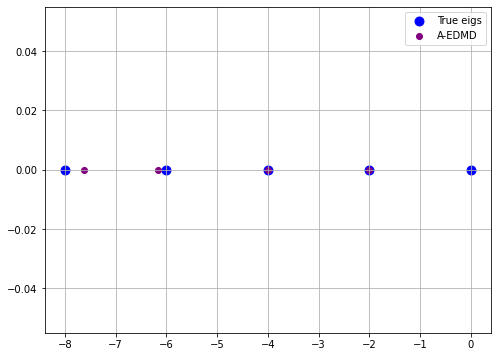

In [55]:
"""Z_h, L_h,_ = GEDMDQ_multiple_trajectories(x_stacked, y_stacked)
Z_m, L_m,_ = GEDMDQ_multiple_trajectories(B_X, B_Y)
Z_herm, L_herm,_ = GEDMDQ_multiple_trajectories(B_X_h, B_Y_h)"""
#mozda i ovima gore treba oduzet 1

fig=plt.figure(figsize=(8,6))
plt.scatter([-8, -6,-4,-2,0], [0,0,0,0,0], label="True eigs", s=80, c="blue")
#logaritmirati pa podijeliti sa delta t..
#plt.scatter(np.real(L_h), (np.imag(L_h)), label="Hankel, stacked={}".format(num_stack), c="r")
#plt.scatter(np.real(L_m), np.imag(L_m), label="Monomial EDMD", c="g")
#plt.scatter(np.real(L_herm), np.imag(L_herm), label="Hermitian EDMD", c="y")
plt.scatter(np.real(eigenvalues[:-1]), np.imag(eigenvalues[:-1]), label="A-EDMD", c="purple")
#plt.title("")
plt.legend()
plt.grid()
fig.savefig("AEDMD-szabo_kernel-and-exact-eigs-comparison-up_to_deg_6.png",dpi=fig.dpi, bbox_inches='tight')

### VERZIJA SA DUŽIM TRAJEKTORIJAMA

In [56]:
Z, L = DMD(x_dugacki, y_dugacki)
print(Z)
print(L)

[[-1.]]
[1.02651619]


In [57]:
n,m = x_dugacki.shape
num_stack = 10

x_stacked_d = x_dugacki[:,:(m-num_stack+1)]
y_stacked_d = y_dugacki[:,:(m-num_stack+1)]

for i in range(1,num_stack):
    x_stacked_d=np.vstack((x_stacked_d,x_dugacki[:,i:(m-num_stack+1+i)]))
    y_stacked_d=np.vstack((y_stacked_d,y_dugacki[:,i:(m-num_stack+1+i)]))

(n_s_d,m_s_d)=x_stacked_d.shape

x_stacked_d, y_stacked_d, n_s_d, m_s_d

(array([[0.85043719, 0.87260706, 0.89210894, 0.90908768, 0.92373466,
         0.39857205, 0.43294231, 0.46884572, 0.50598823, 0.54399791,
         0.21584326, 0.23732286, 0.26066214, 0.28593357, 0.31318363,
         0.98444445, 0.98721035, 0.98949233, 0.99137249, 0.99291983,
         0.86691331, 0.88712071, 0.90476059, 0.92001376, 0.93309337,
         0.87014351, 0.88995239, 0.9072183 , 0.92212813, 0.93489837,
         0.12427128, 0.1371068 , 0.15121209, 0.16669379, 0.18366103,
         0.14135452, 0.15587649, 0.17180865, 0.18926047, 0.20834066,
         0.26776118, 0.29360077, 0.32142628, 0.35123655, 0.38298132,
         0.01139901, 0.01259768, 0.01392234, 0.01538624, 0.01700398,
         0.59141189, 0.62968454, 0.66723777, 0.7035521 , 0.73814931,
         0.5179834 , 0.5561789 , 0.594647  , 0.63287957, 0.67034815,
         0.97702181, 0.98106959, 0.98442139, 0.98719133, 0.98947665,
         0.86082138, 0.88176806, 0.90010531, 0.91600156, 0.92966281,
         0.77529284, 0.80494246, 0

In [58]:
N = 10 #max stupanj
B_X_d=multivariate_monomials_sympy(x_dugacki[:,0], N)
B_X_d = np.fromiter(B_X_d.values(), dtype=complex).reshape(-1,1)
B_Y_d = multivariate_monomials_sympy(y_dugacki[:,0], N)
B_Y_d = np.fromiter(B_Y_d.values(), dtype=complex).reshape(-1,1)

for i in range(1, x_dugacki.shape[1]):
    novi_x = multivariate_monomials_sympy(x_dugacki[:,i], N)
    novi_x = np.fromiter(novi_x.values(), dtype=complex).reshape(-1,1)
    novi_y = multivariate_monomials_sympy(y_dugacki[:,i], N)
    novi_y = np.fromiter(novi_y.values(), dtype=complex).reshape(-1,1)
    B_X_d=np.hstack((B_X_d, novi_x))
    B_Y_d = np.hstack((B_Y_d, novi_y))
B_X_d = np.array(B_X_d)
B_Y_d = np.array(B_Y_d)

In [59]:
B_X_d_h = np.empty((N, m))
B_Y_d_h = np.empty((N,m))
for i in range (N):
    hm = special.hermite(i, True)
    B_X_d_h[i,:] = hm(x_dugacki[:,:]).reshape(1,-1)
    B_Y_d_h[i,:] = hm(y_dugacki[:,:]).reshape(1,-1)


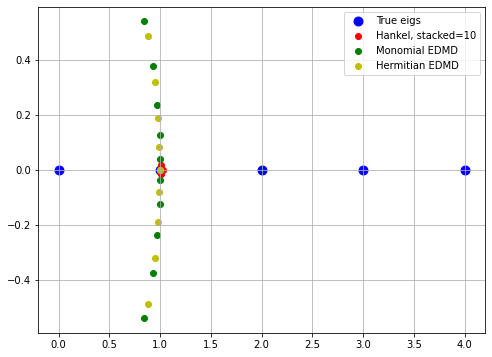

In [60]:
Z_h, L_h = DMD(x_stacked_d, y_stacked_d)
Z_m, L_m = DMD(B_X_d, B_Y_d)
Z_herm, L_herm = DMD(B_X_d_h, B_Y_d_h)

fig=plt.figure(figsize=(8,6))
plt.scatter([0,1,2,3,4], [0,0,0,0,0], label="True eigs", s=80, c="blue")
plt.scatter(np.real(L_h), np.imag(L_h), label="Hankel, stacked={}".format(num_stack), c="r")
plt.scatter(np.real(L_m), np.imag(L_m), label="Monomial EDMD", c="g")
plt.scatter(np.real(L_herm), np.imag(L_herm), label="Hermitian EDMD", c="y")
#plt.title("")
plt.legend()
plt.grid()
fig.savefig("Hankel-num_stack={}-monomials_up_to_deg_{}-hermitian_polynomials_up_to_deg_{}-and-exact-eigs-comparison.png".format(num_stack, N,N),dpi=fig.dpi, bbox_inches='tight')

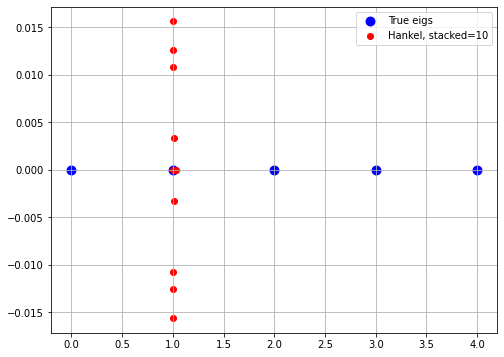

In [61]:
Z_h, L_h = DMD(x_stacked_d, y_stacked_d)
Z_m, L_m = DMD(B_X_d, B_Y_d)
Z_herm, L_herm = DMD(B_X_d_h, B_Y_d_h)

fig=plt.figure(figsize=(8,6))
plt.scatter([0,1,2,3,4], [0,0,0,0,0], label="True eigs", s=80, c="blue")
plt.scatter(np.real(L_h), np.imag(L_h), label="Hankel, stacked={}".format(num_stack), c="r")
#plt.scatter(np.real(L_m), np.imag(L_m), label="Monomial EDMD", c="g")
#plt.scatter(np.real(L_herm), np.imag(L_herm), label="Hermitian EDMD", c="y")
#plt.title("")
plt.legend()
plt.grid()
fig.savefig("Hankel-num_stack={}-monomials_up_to_deg_{}-hermitian_polynomials_up_to_deg_{}-and-exact-eigs-comparison.png".format(num_stack, N,N),dpi=fig.dpi, bbox_inches='tight')

In [62]:
def szabo_kernel(x,y):
    rez = 1
    for j in range(x.shape[0]):
        rez = rez*(1/(1-x[j]*y[j]))
    return rez

def e0(x): return 1.0
def e1(x): return x[0]
def e2(x): return x[0]**2
def e3(x): return x[0]**3
def e4(x): return x[0]**4
def e5(x): return x[0]**5
def e6(x): return x[0]**6
def e7(x): return x[0]**7
def e8(x): return x[0]**8
def e9(x): return x[0]**9
def e10(x): return x[0]**10
def e11(x): return x[0]**11


basis = [e0, e1, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11]

In [85]:
def generate_monomial_basis_one_var(max_degree):
    basis = []
    degrees = []
    
    for d in range(max_degree + 1):
        def make_func(d):
            return lambda x: (x[0]**d)
            
        basis.append(make_func(d))
        degrees.append(d)
    
    return basis, np.array(degrees)

# Example usage for degree up to 8:
basis_gen, degs_gen = generate_monomial_basis_one_var(11)
print(len(basis_gen), len(degs_gen))  # Should output 45 for each (since (8+1)(8+2)/2 = 45)

12 12


In [86]:
K_d, eigenvalues_d, eigenfunction_coeffs_d = analytic_edmd(
    x_dugacki.T, y_dugacki.T,
    equilibrium_point=np.array([0.0]),
    kernel_func=szabo_kernel,
    basis_funcs=basis_gen,
    degrees=degs_gen,
    delta_t=0.1,
    continuous_time=True,
    on=False
)

print("Koopman matrix approximation:")
print(K_d)
print("\nKoopman eigenvalues:")
print(eigenvalues_d)
print("\nEigenfunction coefficients:")
print(eigenfunction_coeffs_d)

G: [[3.61328339 3.87743415 4.14392035 ... 1.51496446 1.58527688 1.66602462]
 [3.87743415 4.19187162 4.51386897 ... 1.53557884 1.60983894 1.69546201]
 [4.14392035 4.51386897 4.89855987 ... 1.55418185 1.63208306 1.72223042]
 ...
 [1.51496446 1.53557884 1.55418185 ... 1.19013464 1.2099489  1.23135735]
 [1.58527688 1.60983894 1.63208306 ... 1.2099489  1.23223096 1.25639298]
 [1.66602462 1.69546201 1.72223042 ... 1.23135735 1.25639298 1.28364756]]
K.shape: (12, 12)
[[ 1.00000000e+00 -2.26162478e-07 -4.24758388e-07 -5.88324674e-07
  -7.17975554e-07 -8.20495631e-07 -9.00910313e-07 -9.44066332e-07
  -9.49071385e-07 -9.96950683e-07 -1.12931101e-06 -1.20715378e-06]
 [-7.63634228e-17  1.10519176e+00  3.92702389e-05  5.45797407e-05
   6.66630734e-05  7.63238301e-05  8.42039908e-05  8.76816253e-05
   8.55631711e-05  8.97886777e-05  1.08998768e-04  1.24497421e-04]
 [-4.30612798e-16 -7.49879873e-04  1.21996873e+00 -1.99695478e-03
  -2.43953536e-03 -2.79482605e-03 -3.08639221e-03 -3.20347578e-03
  -3.

c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:90: RuntimeWarning: invalid value encountered in log


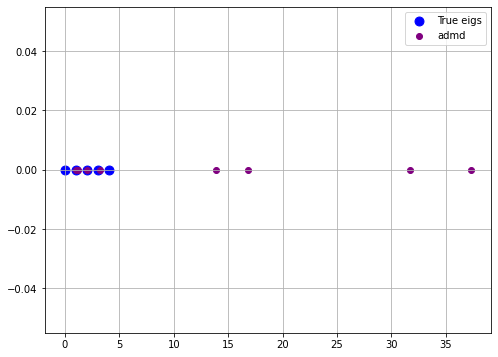

In [87]:
Z_h, L_h = DMD(x_stacked_d, y_stacked_d)
Z_m, L_m = DMD(B_X_d, B_Y_d)
Z_herm, L_herm = DMD(B_X_d_h, B_Y_d_h)

fig=plt.figure(figsize=(8,6))
plt.scatter([0,1,2,3,4], [0,0,0,0,0], label="True eigs", s=80, c="blue")
#plt.scatter(np.real(L_h), np.imag(L_h), label="Hankel, stacked={}".format(num_stack), c="r")
plt.scatter(np.real(eigenvalues_d), np.imag(eigenvalues_d), label="admd", c="purple")
#plt.scatter(np.real(L_m), np.imag(L_m), label="Monomial EDMD", c="g")
#plt.scatter(np.real(L_herm), np.imag(L_herm), label="Hermitian EDMD", c="y")
#plt.title("")
plt.legend()
plt.grid()
fig.savefig("AEDMD-szabo_kernel_up_to_deg_11-and-exact-eigs-comparison-MULTIPLE_TRAJECTORIES.png".format(num_stack, N,N),dpi=fig.dpi, bbox_inches='tight')
#fig.savefig("Hankel-num_stack={}-monomials_up_to_deg_{}-hermitian_polynomials_up_to_deg_{}-AEDMD-szabo_kernel_up_to_deg_11-and-exact-eigs-comparison-MULTIPLE_TRAJECTORIES.png".format(num_stack, N,N),dpi=fig.dpi, bbox_inches='tight')

## Van der Pol dynamics

In [88]:
x=(np.random.rand(50,2)-0.5)*2
x[0]

array([-0.32949341, -0.76079125])

In [89]:
#Van der Pol oscillator system
x=(np.random.rand(50,2)-0.5)*2 
y=[]
for i in range(50):
    initial_condition = x[i]
    mu=1
    t_span=(0,5)
    t_eval = np.linspace(t_span[0], t_span[1], 500001)


    def van_der_pol(t, state, mu):
        x, y = state
        dxdt = -y
        dydt = -mu * (1 - x**2) * y + x
        return [dxdt, dydt]


    sol = solve_ivp(van_der_pol, t_span, [initial_condition[0], initial_condition[1]], args=(mu,), t_eval=t_eval, vectorized=True) #u sol.y[0] i sol.y[1] su (x,y) koordinate točke za svaki trenutak

    #print(sol.y[0].shape, sol.y[1].shape)
    #print(sol.t.shape)
    y.append(np.array([sol.y[0][100000],sol.y[1][100000]]))

"""plt.figure(figsize=(8,6))
plt.plot(sol.y[0], sol.y[1], label=f"μ={mu}, x0={initial_condition[0]}, y0={initial_condition[1]}")

    
plt.title("Van der Pol oscillator")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

t_eval"""

del (t_eval)
y=np.array(y)

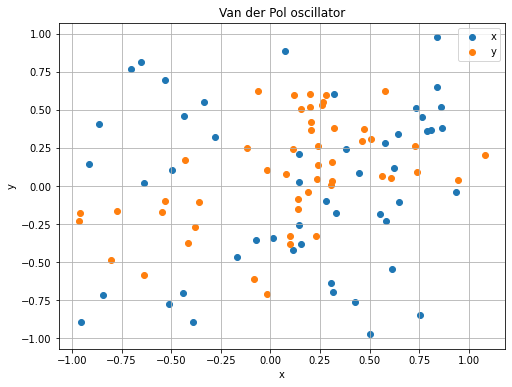

In [90]:
plt.figure(figsize=(8, 6))
plt.scatter(x[:,0], x[:,1], label="x")
plt.scatter(y[:,0], y[:,1], label="y")

    
plt.title("Van der Pol oscillator")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

In [91]:
def e1(x): return 1.0
def e2(x): return x[0]
def e3(x): return x[1]
def e4(x): return x[0]**2
def e5(x): return x[0]*x[1]
def e6(x): return x[1]**2
def e7(x): return x[0]**3
def e8(x): return x[1]**3
def e10(x): return x[0]**2*x[1]**1
def e11(x): return x[1]**2*x[0]**1
def e12(x): return x[0]**4
def e13(x): return x[1]**4
def e14(x): return x[0]**3*x[1]**1
def e15(x): return x[0]**2*x[1]**2
def e16(x): return x[0]**1*x[1]**3
def e17(x): return x[0]**5
def e18(x): return x[1]**5
def e19(x): return x[0]**4*x[1]**1
def e20(x): return x[0]**3*x[1]**2
def e21(x): return x[0]**2*x[1]**3
def e22(x): return x[0]**1*x[1]**4
def e23(x): return x[0]**6
def e24(x): return x[1]**6
def e25(x): return x[0]**5*x[1]**1
def e26(x): return x[0]**4*x[1]**2
def e27(x): return x[0]**3*x[1]**3
def e28(x): return x[0]**2*x[1]**4
def e29(x): return x[0]**1*x[1]**5




basis= [e1, e2, e3, e4, e5, e6, e7, e8, e10, e11]
degs = np.array([0,1,1,2,2,2,3,3,3,3])
len(basis), len(degs)

(10, 10)

In [ ]:
basis = [e1, e2, e3, e4, e5, e6, e7, e8, e10, e11, e12, e13, e14, e15, e16, e17, e18, e19, e20, e21, e22, e23, e24, e25, e26, e27, e28, e29]
degs=np.array([0,1,1,2,2,2,3,3,3,3,4,4,4,4,4,5,5,5,5,5,5,6,6,6,6,6,6,6])
print(len(basis), len(degs))


def generate_monomial_basis(max_degree):
    basis = []
    degrees = []
    
    for d in range(max_degree + 1):
        # Generate all combinations of exponents that sum to d
        for i in range(d + 1):
            j = d - i  # since i + j = d
            
            # Create the basis function
            def make_func(i, j):
                return lambda x: (x[0]**i) * (x[1]**j)
            
            basis.append(make_func(i, j))
            degrees.append(d)
    
    return basis, np.array(degrees)

# Example usage for degree up to 8:
basis_gen, degs_gen = generate_monomial_basis(6)
print(len(basis_gen), len(degs_gen))  # Should output 45 for 8 (since (8+1)(8+2)/2 = 45)

28 28
28 28


In [97]:
K, eigenvalues, eigenfunction_coeffs = analytic_edmd(
    x, y,
    equilibrium_point=np.array([0.0, 0.0]),
    kernel_func=szabo_kernel,
    basis_funcs=basis_gen,
    degrees=degs_gen,
    delta_t=1,
    continuous_time=True,
    on=False
)

print("Koopman matrix approximation:")
print(K)
print("\nKoopman eigenvalues:")
print(eigenvalues)
print("\nEigenfunction coefficients:")
print(eigenfunction_coeffs)

G: [[1.76228537 1.52111144 1.62511722 ... 0.82663503 0.93802292 0.84003707]
 [1.52111144 4.74153748 4.86197448 ... 0.69987723 0.49367394 1.84002274]
 [1.62511722 4.86197448 5.10006246 ... 0.69323218 0.49528375 1.74512493]
 ...
 [0.82663503 0.69987723 0.69323218 ... 1.23299423 1.39538991 0.92400673]
 [0.93802292 0.49367394 0.49528375 ... 1.39538991 2.28074551 0.70995652]
 [0.84003707 1.84002274 1.74512493 ... 0.92400673 0.70995652 1.69039197]]
K.shape: (28, 28)
[[ 1.00000000e+00  2.98630707e-05 -2.45538700e-05 -9.45454113e-05
  -1.92392003e-05  2.05646647e-05  3.43839963e-05 -1.87337649e-05
  -4.49571756e-05  1.52789107e-05 -1.90980445e-05  1.42773802e-05
  -2.01838014e-05 -2.88920790e-05  1.36654166e-04  1.00580648e-05
   3.02514380e-05  3.84346068e-06 -6.17297569e-05 -7.71905810e-05
   5.08511172e-05 -2.79614493e-05  7.09378676e-06  3.00672489e-05
   2.28451557e-05  6.39451958e-06  7.69344000e-05  3.82625135e-04]
 [-9.02721791e-17  1.26223833e-01 -5.33566713e-01  2.04549150e-04
  -5.9

In [93]:
a=-0.5
b=np.sqrt(3)/2

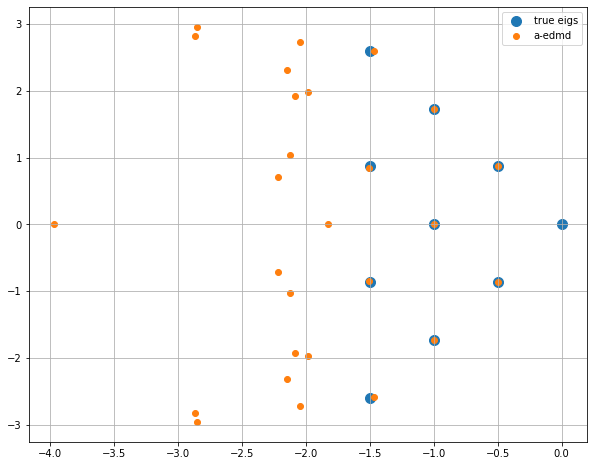

In [ ]:
fig=plt.figure(figsize=(10,8))
plt.scatter(np.real([-1.5, -1.5, -1.5, -1.5, -1, -1, -1, -0.5, -0.5, 0]), ([b,-b,3*b,-3*b,2*b,0, -2*b,b,-b,0]), s=100, label="true eigs")
plt.scatter(np.real(eigenvalues), np.imag(eigenvalues), label="a-edmd")
plt.legend()
plt.grid()

#fig.savefig("VDP-aedmd-up_to_deg_6-true_eigs-comparison.png",dpi=fig.dpi, bbox_inches='tight')

veliki primjer

In [99]:
#Van der Pol oscillator system
x=(np.random.rand(250,2)-0.5)*2 
y=[]
for i in range(250):
    initial_condition = x[i]
    mu=1
    t_span=(0,5)
    t_eval = np.linspace(t_span[0], t_span[1], 500001)


    def van_der_pol(t, state, mu):
        x, y = state
        dxdt = -y
        dydt = -mu * (1 - x**2) * y + x
        return [dxdt, dydt]


    sol = solve_ivp(van_der_pol, t_span, [initial_condition[0], initial_condition[1]], args=(mu,), t_eval=t_eval, vectorized=True) #u sol.y[0] i sol.y[1] su (x,y) koordinate točke za svaki trenutak

    #print(sol.y[0].shape, sol.y[1].shape)
    #print(sol.t.shape)
    y.append(np.array([sol.y[0][50000],sol.y[1][50000]]))

"""plt.figure(figsize=(8,6))
plt.plot(sol.y[0], sol.y[1], label=f"μ={mu}, x0={initial_condition[0]}, y0={initial_condition[1]}")

    
plt.title("Van der Pol oscillator")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

t_eval"""

del (t_eval)
y=np.array(y)

In [100]:
K, eigenvalues, eigenfunction_coeffs = analytic_edmd(
    x, y,
    equilibrium_point=np.array([0.0, 0.0]),
    kernel_func=szabo_kernel,
    basis_funcs=basis_gen,
    degrees=degs_gen,
    delta_t=0.5,
    continuous_time=True,
    on=False
)

print("Koopman matrix approximation:")
print(K)
print("\nKoopman eigenvalues:")
print(eigenvalues)
print("\nEigenfunction coefficients:")
print(eigenfunction_coeffs)

G: [[ 1.68104844  0.77010007  0.541791   ...  1.58775996  1.05918707
   2.34471257]
 [ 0.77010007  1.83727315  2.64413648 ...  0.68725547  1.56400598
   0.622347  ]
 [ 0.541791    2.64413648 25.90395935 ...  0.61158929  1.30318286
   0.46810453]
 ...
 [ 1.58775996  0.68725547  0.61158929 ...  1.83821234  0.7579326
   2.90960668]
 [ 1.05918707  1.56400598  1.30318286 ...  0.7579326   2.16794121
   0.79298429]
 [ 2.34471257  0.622347    0.46810453 ...  2.90960668  0.79298429
  20.56070456]]
K.shape: (28, 28)
[[ 1.00000000e+00  1.11281442e-04 -2.96390995e-05 -3.89641060e-05
  -2.80172601e-05  6.20184759e-05  1.97777523e-05  2.42976684e-05
   1.28414048e-05 -5.15300029e-05 -6.92931375e-06 -1.03518984e-05
  -1.16911089e-05 -2.90511285e-06  4.73142022e-05  8.53494813e-07
   3.05680830e-06  4.51680187e-06  3.67758383e-06 -1.87804028e-06
  -3.93658821e-05  3.33495551e-07 -9.19088649e-07 -1.74797944e-06
  -2.69304296e-06 -1.56330726e-06  3.38661586e-06  3.41946012e-05]
 [-3.60018913e-17  5.1789

In [101]:
x_os = []
y_os = []
for i in range(9,0,-1):
    x_os = x_os + [(i-1)*a]*i
    for j in range(i//2):
        if (i%2==0):
            y_os = y_os+[(2*j+1)*b, -(2*j+1)*b]
        else:
            y_os = y_os+[2*(j+1)*b, -2*(j+1)*b]
    if(i%2!=0):
        y_os = y_os+[0]
print(len(x_os),len(y_os))


45 45


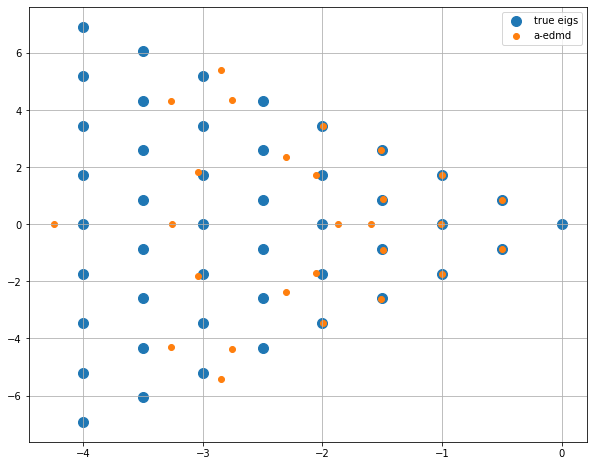

In [102]:
plt.figure(figsize=(10,8))
plt.scatter(x_os, y_os, s=100, label="true eigs")
plt.scatter(np.real(eigenvalues), np.imag(eigenvalues), label="a-edmd")
plt.legend()
plt.grid()